#Creating simple LangGraph

In [ ]:
from typing_extensions import TypedDict 
#When graph executed - it should retain all information in state scema as json

In [5]:
class State(TypedDict):
    graph_info: str

In [11]:
def start_play(state : State):
    print("Start Play node has been called")
    return {"graph_info": "I am planning to play"}

def cricket(state:State):
    print("Cricket node has been called")
    return {"graph_info": state["graph_info"] + " cricket"}

def football(state:State):
    print("Football node has been called")
    return {"graph_info": state["graph_info"] + " football"}

def end_play(state:State):
    print("End Play node has been called")
    return {"graph_info": state["graph_info"] + "!"}

In [12]:
import random
from typing import Literal

def random_play(state:State) -> Literal["cricket", "football"]:
    choice = random.choice(["cricket", "football"])
    return choice

In [23]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

#build Graph
graph=StateGraph(State)

#add all nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("football", football)
graph.add_node("end_play1", end_play)

#schedule note of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", "end_play1")
graph.add_edge("football", "end_play1")
graph.add_edge("end_play1", END)

#compile graph
graph_buider=graph.compile()

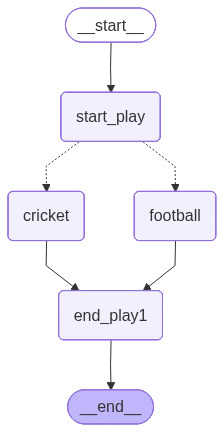

In [24]:
#view graph
display(Image(graph_buider.get_graph().draw_mermaid_png()))